Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


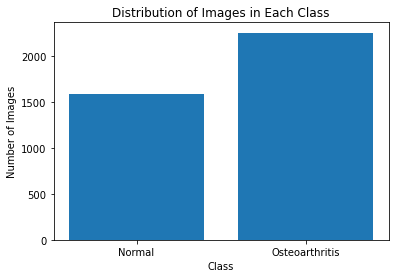

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-28 12:16:51.518063: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-28 12:16:51.518881: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 12:16:51.557125: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 12:16:51.749378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 12:16:52.252820: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


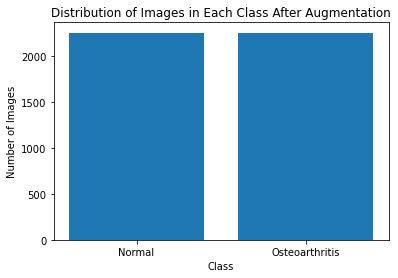

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 1500)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 1500)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 1500 + [1] * 1500  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 1680
X_test size: 900
X_validation size: 420


In [4]:
import cv2

def preprocess_image_cv2(image):
    # Resize image to (224, 224)
    resized_image = cv2.resize(image, (224, 224))
    # Scale pixel values to [0, 1]
    normalized_image = resized_image / 255.0
    return normalized_image

# Preprocess images in your dataset
X_train_preprocessed = np.array([preprocess_image_cv2(img) for img in X_train])
X_val_preprocessed = np.array([preprocess_image_cv2(img) for img in X_val])
X_test_preprocessed = np.array([preprocess_image_cv2(img) for img in X_test])

In [5]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

# Denset201

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,290,113 (77.40 MB)

 Trainable params: 1,968,129 (7.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8608 - loss: 0.3617 - val_accuracy: 0.8357 - val_loss: 0.3596
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8697 - loss: 0.3158 - val_accuracy: 0.8595 - val_loss: 0.3506
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8892 - loss: 0.2908 - val_accuracy: 0.8667 - val_loss: 0.3230
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8848 - loss: 0.2821 - val_accuracy: 0.8619 - val_loss: 0.3182
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8949 - loss: 0.2559 - val_accuracy: 0.8786 - val_loss: 0.3177
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9023 - loss: 0.2561 - val_accuracy: 0.8786 - val_loss: 0.3026
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9237 - loss: 0.2233 - val_accuracy: 0.8833 - val_loss: 0.3003
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9263 - loss: 0.2138 - val_accuracy: 0.8905 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 920ms/step
Inference Time: 14.689714908599854 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 799ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


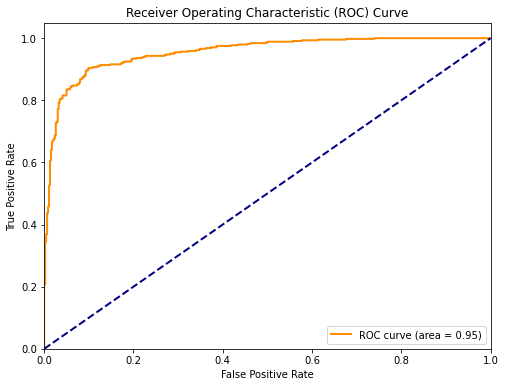

Validation Loss: 0.2627433240413666
Validation Accuracy: 0.8976190686225891
Test Loss: 0.26856696605682373
Test Accuracy: 0.898888885974884
ROC AUC: 0.9543974424223857
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv', index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9688 - loss: 0.1175 - val_accuracy: 0.9000 - val_loss: 0.2634
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9674 - loss: 0.1088 - val_accuracy: 0.8952 - val_loss: 0.2685
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9705 - loss: 0.1105 - val_accuracy: 0.8881 - val_loss: 0.2707
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9783 - loss: 0.0974 - val_accuracy: 0.8929 - val_loss: 0.2667
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9841 - loss: 0.0872 - val_accuracy: 0.8857 - val_loss: 0.2671
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9694 - loss: 0.0962 - val_accuracy: 0.8881 - val_loss: 0.2645
Training Time: 325.3327867984772 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step
Inference Time: 10.966375350952148 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 800ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


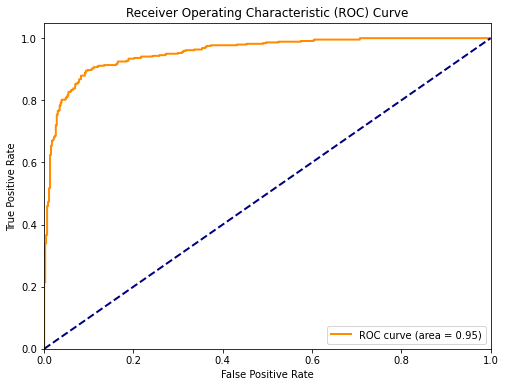

Validation Loss: 0.26342445611953735
Validation Accuracy: 0.8999999761581421
Test Loss: 0.2674840986728668
Test Accuracy: 0.8966666460037231
ROC AUC: 0.9544073248706635
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv', index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9700 - loss: 0.1044 - val_accuracy: 0.8738 - val_loss: 0.2865
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9724 - loss: 0.1052 - val_accuracy: 0.8738 - val_loss: 0.2937
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9662 - loss: 0.1053 - val_accuracy: 0.8857 - val_loss: 0.2687
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9747 - loss: 0.1000 - val_accuracy: 0.8810 - val_loss: 0.2772
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9770 - loss: 0.0909 - val_accuracy: 0.8929 - val_loss: 0.2626
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9805 - loss: 0.0914 - val_accuracy: 0.8857 - val_loss: 0.2688
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9871 - loss: 0.0808 - val_accuracy: 0.8881 - val_loss: 0.2654
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9907 - loss: 0.0804 - val_accuracy: 0.8976 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 767ms/step
Inference Time: 10.939037322998047 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 798ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


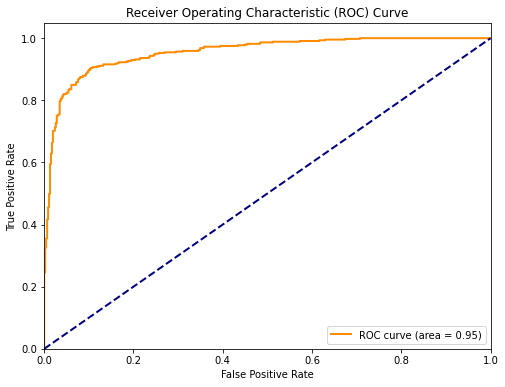

Validation Loss: 0.26256388425827026
Validation Accuracy: 0.8928571343421936
Test Loss: 0.26962196826934814
Test Accuracy: 0.8966666460037231
ROC AUC: 0.9546049738362181
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv', index=False)
print("Metrics saved successfully")

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9797 - loss: 0.0916 - val_accuracy: 0.8786 - val_loss: 0.2802
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9785 - loss: 0.0899 - val_accuracy: 0.8952 - val_loss: 0.2622
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9876 - loss: 0.0756 - val_accuracy: 0.8810 - val_loss: 0.2822
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9838 - loss: 0.0825 - val_accuracy: 0.8881 - val_loss: 0.2697
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9807 - loss: 0.0785 - val_accuracy: 0.8905 - val_loss: 0.2694
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9862 - loss: 0.0726 - val_accuracy: 0.8833 - val_loss: 0.2801
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9928 - loss: 0.0671 - val_accuracy: 0.8857 - val_loss: 0.2771
Training Time: 379.4319875240326 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step
Inference Time: 10.959574222564697 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 798ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


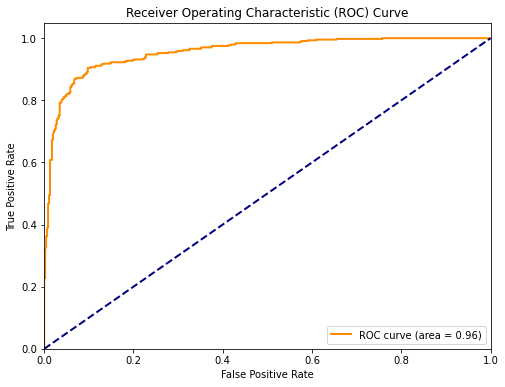

Validation Loss: 0.26215702295303345
Validation Accuracy: 0.8952381014823914
Test Loss: 0.2710926830768585
Test Accuracy: 0.902222216129303
ROC AUC: 0.9551238023707993
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

# Save metrics to a DataFrame and then to a CSV file
metrics = {
    'Combination':'Densenet',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df = pd.DataFrame(metrics, index=[0])
metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv', index=False)
print("Metrics saved successfully")

# Densenet+Dense

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Add an additional dense layer
x = Dense(512, activation='relu')(predictions)  # Example dense layer with 512 units

# Combine base model, custom classification head, and additional dense layer
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,291,137 (77.40 MB)

 Trainable params: 1,969,153 (7.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 512)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Dropout(1)+Dense(2)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add first dense layer
x = Dense(512, activation='relu')(x)

# Add dropout layer
x = Dropout(0.5)(x)  # Adding dropout with rate 0.5

# Add second dense layer
x = Dense(256, activation='relu')(x)

predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,945,473 (79.90 MB)

 Trainable params: 2,623,489 (10.01 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6134 - loss: 0.6575 - val_accuracy: 0.8048 - val_loss: 0.4769
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 52s 991ms/step - accuracy: 0.8133 - loss: 0.4388 - val_accuracy: 0.8476 - val_loss: 0.3727
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8588 - loss: 0.3381 - val_accuracy: 0.8310 - val_loss: 0.4103
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8621 - loss: 0.3203 - val_accuracy: 0.8714 - val_loss: 0.3167
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8902 - loss: 0.2798 - val_accuracy: 0.8571 - val_loss: 0.3025
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9047 - loss: 0.2451 - val_accuracy: 0.8667 - val_loss: 0.2925
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8873 - loss: 0.2647 - val_accuracy: 0.8762 - val_loss: 0.2940
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9063 - loss: 0.2176 - val_accuracy: 0.8881 - val_lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 909ms/step
Inference Time: 14.484074354171753 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


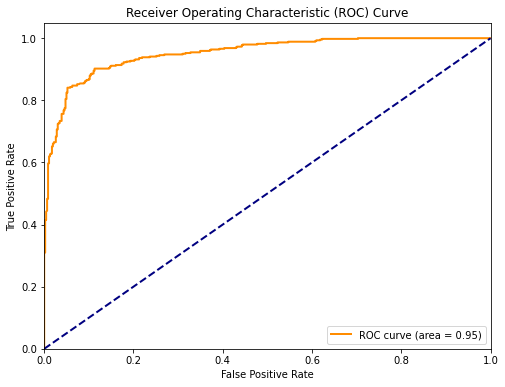

Validation Loss: 0.26870229840278625
Validation Accuracy: 0.8809523582458496
Test Loss: 0.29639509320259094
Test Accuracy: 0.8799999952316284
ROC AUC: 0.9515562385425366
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9361 - loss: 0.1579 - val_accuracy: 0.8905 - val_loss: 0.2704
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9376 - loss: 0.1691 - val_accuracy: 0.8738 - val_loss: 0.3058
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9244 - loss: 0.1708 - val_accuracy: 0.8738 - val_loss: 0.3297
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9434 - loss: 0.1320 - val_accuracy: 0.8810 - val_loss: 0.2815
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9346 - loss: 0.1477 - val_accuracy: 0.8762 - val_loss: 0.3060
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9314 - loss: 0.1749 - val_accuracy: 0.8762 - val_loss: 0.3438
Training Time: 325.76614117622375 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 776ms/step
Inference Time: 11.053224802017212 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 796ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


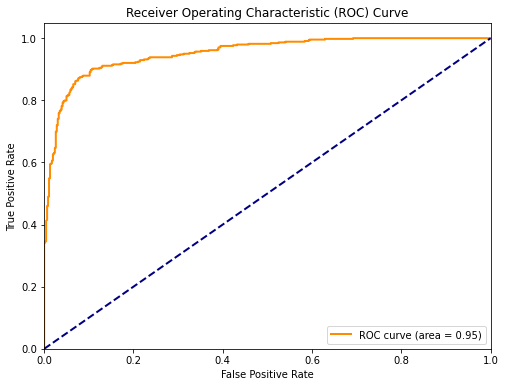

Validation Loss: 0.27037593722343445
Validation Accuracy: 0.8904761672019958
Test Loss: 0.30129918456077576
Test Accuracy: 0.8877778053283691
ROC AUC: 0.9516748279218693
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9336 - loss: 0.1683 - val_accuracy: 0.8786 - val_loss: 0.2832
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9576 - loss: 0.1230 - val_accuracy: 0.8810 - val_loss: 0.2859
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9444 - loss: 0.1548 - val_accuracy: 0.8857 - val_loss: 0.2907
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9625 - loss: 0.1084 - val_accuracy: 0.8929 - val_loss: 0.2922
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9590 - loss: 0.1188 - val_accuracy: 0.8929 - val_loss: 0.2985
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9519 - loss: 0.1203 - val_accuracy: 0.8833 - val_loss: 0.2846
Training Time: 326.059711933136 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 768ms/step
Inference Time: 10.958324432373047 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


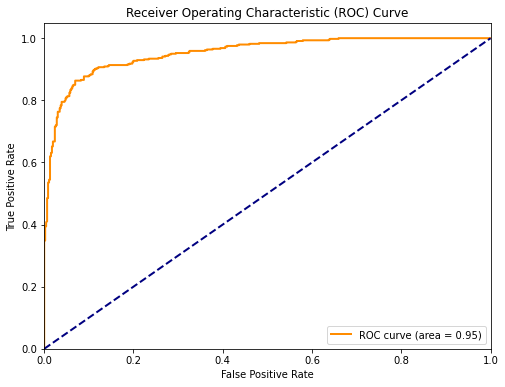

Validation Loss: 0.28319963812828064
Validation Accuracy: 0.8785714507102966
Test Loss: 0.3257049024105072
Test Accuracy: 0.8700000047683716
ROC AUC: 0.9526087192841155
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9364 - loss: 0.1601 - val_accuracy: 0.8857 - val_loss: 0.2664
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9509 - loss: 0.1257 - val_accuracy: 0.8810 - val_loss: 0.2971
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9565 - loss: 0.1170 - val_accuracy: 0.8929 - val_loss: 0.2719
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9482 - loss: 0.1245 - val_accuracy: 0.8833 - val_loss: 0.2903
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9664 - loss: 0.0973 - val_accuracy: 0.8762 - val_loss: 0.2957
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9699 - loss: 0.0805 - val_accuracy: 0.8833 - val_loss: 0.2885
Training Time: 325.88433718681335 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 767ms/step
Inference Time: 10.937771081924438 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 798ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


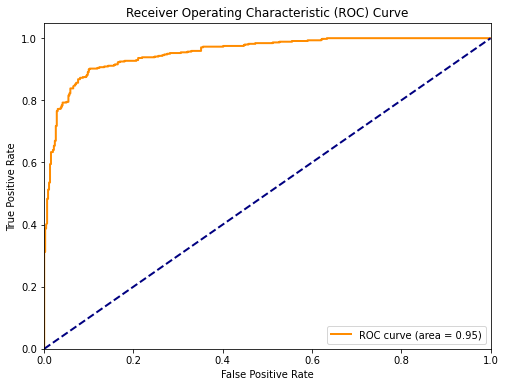

Validation Loss: 0.26644137501716614
Validation Accuracy: 0.8857142925262451
Test Loss: 0.2905113101005554
Test Accuracy: 0.8966666460037231
ROC AUC: 0.953893437560221
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(2)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Dropout(1)+Dense(1)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add dense layer
x = Dense(512, activation='relu')(x)

# Add dropout layer
x = Dropout(0.5)(x)  # Adding dropout with rate 0.5

predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_7… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,814,401 (79.40 MB)

 Trainable params: 2,492,417 (9.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6074 - loss: 0.6752 - val_accuracy: 0.7714 - val_loss: 0.4839
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7970 - loss: 0.4453 - val_accuracy: 0.8238 - val_loss: 0.3945
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8357 - loss: 0.3758 - val_accuracy: 0.8262 - val_loss: 0.3735
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8578 - loss: 0.3243 - val_accuracy: 0.8500 - val_loss: 0.3413
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8709 - loss: 0.2939 - val_accuracy: 0.8643 - val_loss: 0.3139
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8992 - loss: 0.2496 - val_accuracy: 0.8667 - val_loss: 0.2991
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9052 - loss: 0.2401 - val_accuracy: 0.8786 - val_loss: 0.2937
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9153 - loss: 0.2094 - val_accuracy: 0.8810 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 904ms/step
Inference Time: 14.443269968032837 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 797ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


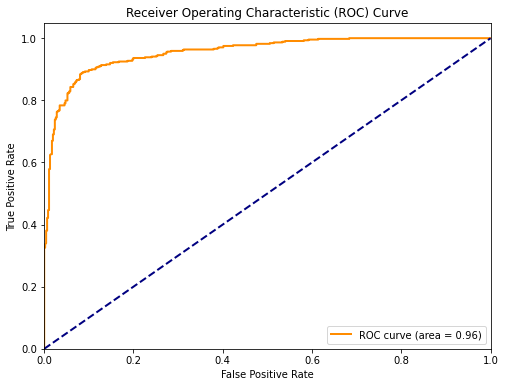

Validation Loss: 0.2589320242404938
Validation Accuracy: 0.8928571343421936
Test Loss: 0.29510554671287537
Test Accuracy: 0.898888885974884
ROC AUC: 0.9550348603362997
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9897 - loss: 0.0491 - val_accuracy: 0.8786 - val_loss: 0.2907
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9931 - loss: 0.0408 - val_accuracy: 0.8857 - val_loss: 0.2786
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9958 - loss: 0.0351 - val_accuracy: 0.8905 - val_loss: 0.2810
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9979 - loss: 0.0292 - val_accuracy: 0.8857 - val_loss: 0.2862
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9992 - loss: 0.0266 - val_accuracy: 0.8833 - val_loss: 0.2982
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9970 - loss: 0.0242 - val_accuracy: 0.8881 - val_loss: 0.3067
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9987 - loss: 0.0204 - val_accuracy: 0.8857 - val_loss: 0.2934
Training Time: 380.4132671356201 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 765ms/step
Inference Time: 10.91075325012207 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 800ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


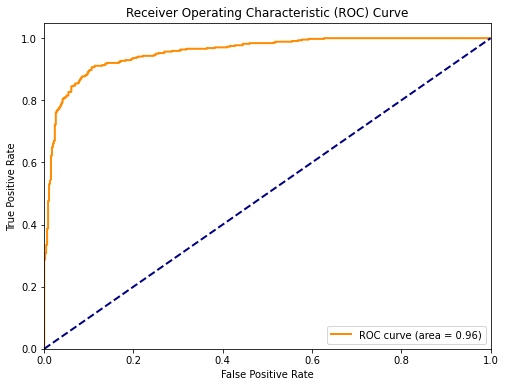

Validation Loss: 0.2785869240760803
Validation Accuracy: 0.8857142925262451
Test Loss: 0.31159698963165283
Test Accuracy: 0.898888885974884
ROC AUC: 0.9553609811294651
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9893 - loss: 0.0400 - val_accuracy: 0.8929 - val_loss: 0.2801
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9926 - loss: 0.0350 - val_accuracy: 0.8881 - val_loss: 0.2947
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9980 - loss: 0.0265 - val_accuracy: 0.8786 - val_loss: 0.2937
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9974 - loss: 0.0281 - val_accuracy: 0.8833 - val_loss: 0.2916
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.8881 - val_loss: 0.3070
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9989 - loss: 0.0201 - val_accuracy: 0.8881 - val_loss: 0.3136
Training Time: 326.7216136455536 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 766ms/step
Inference Time: 10.922947406768799 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 795ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


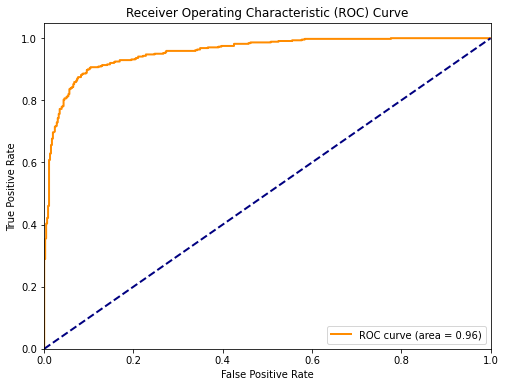

Validation Loss: 0.2801358997821808
Validation Accuracy: 0.8928571343421936
Test Loss: 0.32550248503685
Test Accuracy: 0.8911111354827881
ROC AUC: 0.956186165560656
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [35]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9959 - loss: 0.0313 - val_accuracy: 0.8952 - val_loss: 0.2834
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9974 - loss: 0.0245 - val_accuracy: 0.8929 - val_loss: 0.2916
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9973 - loss: 0.0264 - val_accuracy: 0.8881 - val_loss: 0.3007
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9998 - loss: 0.0184 - val_accuracy: 0.8738 - val_loss: 0.2972
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.8857 - val_loss: 0.3087
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9997 - loss: 0.0112 - val_accuracy: 0.8833 - val_loss: 0.3213
Training Time: 328.49212861061096 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step
Inference Time: 10.971235752105713 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 799ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


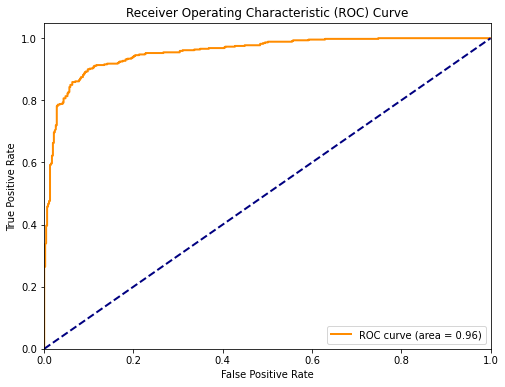

Validation Loss: 0.2834314703941345
Validation Accuracy: 0.8952381014823914
Test Loss: 0.32153356075286865
Test Accuracy: 0.8966666460037231
ROC AUC: 0.9554054521467148
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Dropout(1)+Dense(1)'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+GlobalAveragePooling+Dense

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add additional dense layer
x = Dense(1024, activation='relu')(x)

# Add one more dense layer if needed
# x = Dense(512, activation='relu')(x)

# Add final prediction layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,290,113 (77.40 MB)

 Trainable params: 1,968,129 (7.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [38]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6379 - loss: 0.6279 - val_accuracy: 0.8119 - val_loss: 0.4512
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8440 - loss: 0.4036 - val_accuracy: 0.8452 - val_loss: 0.3895
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8742 - loss: 0.3283 - val_accuracy: 0.8333 - val_loss: 0.3770
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8820 - loss: 0.3081 - val_accuracy: 0.8452 - val_loss: 0.3498
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8828 - loss: 0.2961 - val_accuracy: 0.8714 - val_loss: 0.3229
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8994 - loss: 0.2780 - val_accuracy: 0.8643 - val_loss: 0.3198
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9103 - loss: 0.2524 - val_accuracy: 0.8690 - val_loss: 0.3064
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9157 - loss: 0.2300 - val_accuracy: 0.8810 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 911ms/step
Inference Time: 14.521186351776123 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


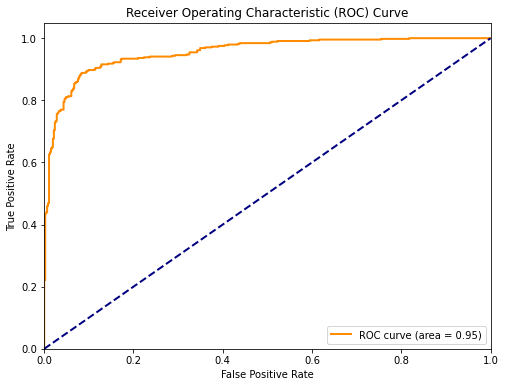

Validation Loss: 0.2700490355491638
Validation Accuracy: 0.8880952596664429
Test Loss: 0.2770310044288635
Test Accuracy: 0.8933333158493042
ROC AUC: 0.9542146171292476
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9330 - loss: 0.1737 - val_accuracy: 0.8881 - val_loss: 0.2689
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9568 - loss: 0.1592 - val_accuracy: 0.8714 - val_loss: 0.3022
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9443 - loss: 0.1628 - val_accuracy: 0.8857 - val_loss: 0.2652
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9426 - loss: 0.1508 - val_accuracy: 0.8905 - val_loss: 0.2632
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9603 - loss: 0.1292 - val_accuracy: 0.8833 - val_loss: 0.2637
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9593 - loss: 0.1326 - val_accuracy: 0.8881 - val_loss: 0.2652
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9626 - loss: 0.1332 - val_accuracy: 0.8881 - val_loss: 0.2639
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9630 - loss: 0.1241 - val_accuracy: 0.8881 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 772ms/step
Inference Time: 11.005053758621216 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 805ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


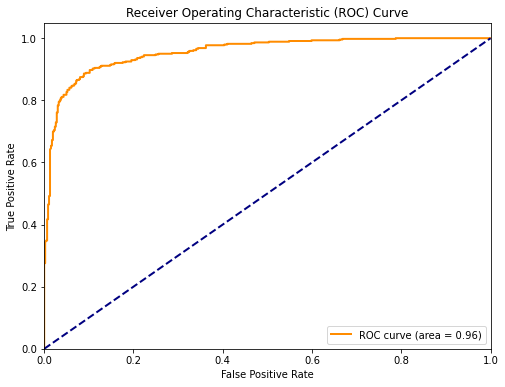

Validation Loss: 0.26047971844673157
Validation Accuracy: 0.8976190686225891
Test Loss: 0.2687087655067444
Test Accuracy: 0.8966666460037231
ROC AUC: 0.955247332974271
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [42]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9797 - loss: 0.0919 - val_accuracy: 0.8762 - val_loss: 0.2821
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9832 - loss: 0.0891 - val_accuracy: 0.8810 - val_loss: 0.2771
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9836 - loss: 0.0931 - val_accuracy: 0.8786 - val_loss: 0.2693
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9800 - loss: 0.0841 - val_accuracy: 0.8810 - val_loss: 0.2739
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9846 - loss: 0.0814 - val_accuracy: 0.8857 - val_loss: 0.2692
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9846 - loss: 0.0739 - val_accuracy: 0.8881 - val_loss: 0.2748
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9867 - loss: 0.0785 - val_accuracy: 0.8929 - val_loss: 0.2609
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9890 - loss: 0.0749 - val_accuracy: 0.8905 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 770ms/step
Inference Time: 10.98655652999878 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 805ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


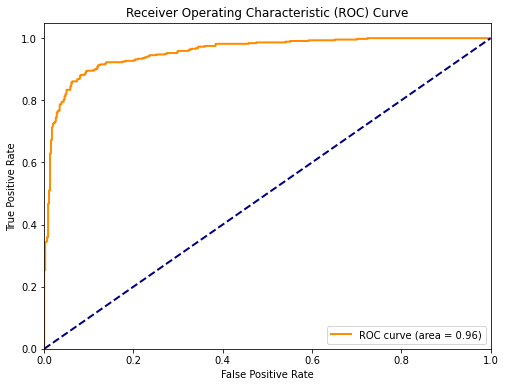

Validation Loss: 0.26027336716651917
Validation Accuracy: 0.8880952596664429
Test Loss: 0.27868422865867615
Test Accuracy: 0.8933333158493042
ROC AUC: 0.9558995745606017
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5986 - loss: 0.6880 - val_accuracy: 0.8167 - val_loss: 0.4722
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8304 - loss: 0.4361 - val_accuracy: 0.8524 - val_loss: 0.3974
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8751 - loss: 0.3612 - val_accuracy: 0.8381 - val_loss: 0.3797
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8714 - loss: 0.3168 - val_accuracy: 0.8476 - val_loss: 0.3499
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8979 - loss: 0.2981 - val_accuracy: 0.8524 - val_loss: 0.3393
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9036 - loss: 0.2782 - val_accuracy: 0.8333 - val_loss: 0.3604
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8936 - loss: 0.2737 - val_accuracy: 0.8667 - val_loss: 0.3131
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9051 - loss: 0.2395 - val_accuracy: 0.8619 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 912ms/step
Inference Time: 14.589260578155518 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 802ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


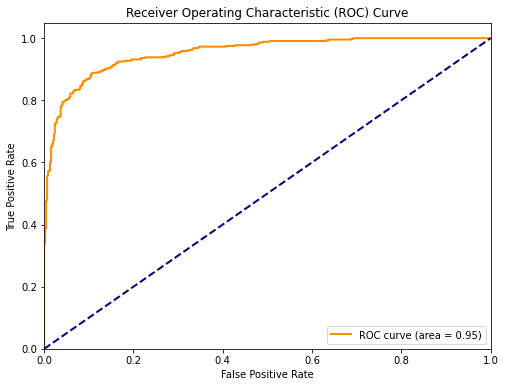

Validation Loss: 0.2671012282371521
Validation Accuracy: 0.8833333253860474
Test Loss: 0.2696598768234253
Test Accuracy: 0.8877778053283691
ROC AUC: 0.9531571951635298
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add additional layers
x = base_model.output

# Add Conv2D layer
x = Conv2D(64, (3, 3), activation='relu')(x)

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 19,495,553 (74.37 MB)

 Trainable params: 1,173,569 (4.48 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5941 - loss: 0.6643 - val_accuracy: 0.8238 - val_loss: 0.4663
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7794 - loss: 0.4797 - val_accuracy: 0.8357 - val_loss: 0.3943
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8383 - loss: 0.3735 - val_accuracy: 0.8476 - val_loss: 0.3479
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8590 - loss: 0.3269 - val_accuracy: 0.8500 - val_loss: 0.3401
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8607 - loss: 0.3440 - val_accuracy: 0.8476 - val_loss: 0.3441
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8818 - loss: 0.2737 - val_accuracy: 0.8310 - val_loss: 0.3885
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8905 - loss: 0.2949 - val_accuracy: 0.8595 - val_loss: 0.3270
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8869 - loss: 0.2776 - val_accuracy: 0.8667 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 909ms/step
Inference Time: 14.490012168884277 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 804ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


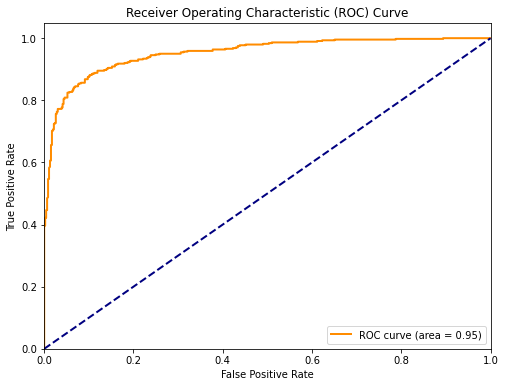

Validation Loss: 0.2988353371620178
Validation Accuracy: 0.8642857074737549
Test Loss: 0.278859406709671
Test Accuracy: 0.8877778053283691
ROC AUC: 0.9517934173012021
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9275 - loss: 0.1907 - val_accuracy: 0.8786 - val_loss: 0.3085
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9397 - loss: 0.1749 - val_accuracy: 0.8690 - val_loss: 0.3121
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9329 - loss: 0.1779 - val_accuracy: 0.8714 - val_loss: 0.3356
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9415 - loss: 0.1562 - val_accuracy: 0.8738 - val_loss: 0.3345
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9370 - loss: 0.1577 - val_accuracy: 0.8643 - val_loss: 0.3387
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9378 - loss: 0.1455 - val_accuracy: 0.8619 - val_loss: 0.3379
Training Time: 328.65493416786194 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 772ms/step
Inference Time: 11.021060466766357 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 805ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


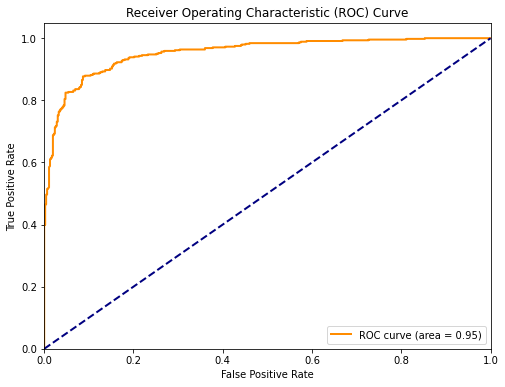

Validation Loss: 0.3084565997123718
Validation Accuracy: 0.8785714507102966
Test Loss: 0.2941833436489105
Test Accuracy: 0.8755555748939514
ROC AUC: 0.9531868425083629
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9372 - loss: 0.1770 - val_accuracy: 0.8500 - val_loss: 0.3228
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9467 - loss: 0.1671 - val_accuracy: 0.8619 - val_loss: 0.3760
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9230 - loss: 0.1924 - val_accuracy: 0.8714 - val_loss: 0.3219
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9412 - loss: 0.1441 - val_accuracy: 0.8786 - val_loss: 0.3168
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9474 - loss: 0.1505 - val_accuracy: 0.8690 - val_loss: 0.3260
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9547 - loss: 0.1229 - val_accuracy: 0.8690 - val_loss: 0.3484
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9555 - loss: 0.1191 - val_accuracy: 0.8690 - val_loss: 0.3258
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9631 - loss: 0.1127 - val_accuracy: 0.8643 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 773ms/step
Inference Time: 11.018831729888916 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 806ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


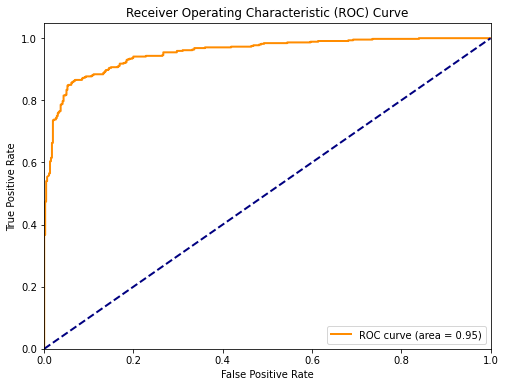

Validation Loss: 0.31679174304008484
Validation Accuracy: 0.8785714507102966
Test Loss: 0.2946870028972626
Test Accuracy: 0.8777777552604675
ROC AUC: 0.9537452008360551
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9452 - loss: 0.1371 - val_accuracy: 0.8714 - val_loss: 0.3310
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9248 - loss: 0.1691 - val_accuracy: 0.8714 - val_loss: 0.3319
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9508 - loss: 0.1340 - val_accuracy: 0.8690 - val_loss: 0.3199
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9601 - loss: 0.1119 - val_accuracy: 0.8738 - val_loss: 0.3351
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9688 - loss: 0.1027 - val_accuracy: 0.8619 - val_loss: 0.3453
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9602 - loss: 0.1032 - val_accuracy: 0.8643 - val_loss: 0.4012
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9549 - loss: 0.1196 - val_accuracy: 0.8643 - val_loss: 0.3354
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9747 - loss: 0.0871 - val_accuracy: 0.8643 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 777ms/step
Inference Time: 11.096004009246826 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


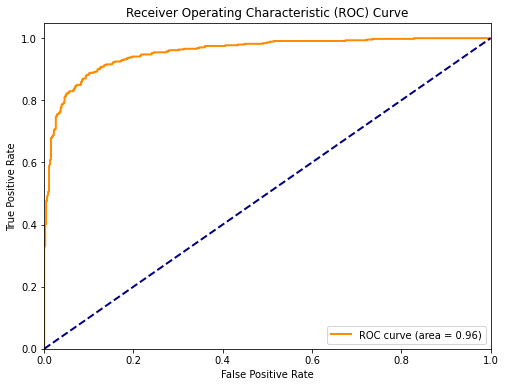

Validation Loss: 0.31994348764419556
Validation Accuracy: 0.8690476417541504
Test Loss: 0.2891125977039337
Test Accuracy: 0.8888888955116272
ROC AUC: 0.9555191003019089
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+LSTM+Dense

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Define a custom layer to expand dimensions
class ExpandDimsLayer(Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

# Reshape to fit LSTM input
x = ExpandDimsLayer()(x)

# LSTM layer
x = LSTM(64)(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,897,729 (72.09 MB)

 Trainable params: 575,745 (2.20 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6063 - loss: 0.6814 - val_accuracy: 0.7500 - val_loss: 0.6183
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7894 - loss: 0.5709 - val_accuracy: 0.8238 - val_loss: 0.4489
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8417 - loss: 0.4092 - val_accuracy: 0.8643 - val_loss: 0.3709
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8591 - loss: 0.3439 - val_accuracy: 0.8381 - val_loss: 0.3534
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8712 - loss: 0.3170 - val_accuracy: 0.8595 - val_loss: 0.3307
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8741 - loss: 0.3028 - val_accuracy: 0.8595 - val_loss: 0.3215
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8909 - loss: 0.2737 - val_accuracy: 0.8595 - val_loss: 0.3218
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8937 - loss: 0.2536 - val_accuracy: 0.8667 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 919ms/step
Inference Time: 14.750520944595337 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


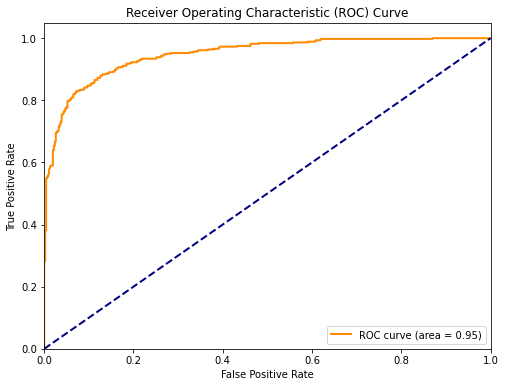

Validation Loss: 0.276215136051178
Validation Accuracy: 0.8714285492897034
Test Loss: 0.3098328411579132
Test Accuracy: 0.8688889145851135
ROC AUC: 0.9475736118866088
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9475 - loss: 0.1460 - val_accuracy: 0.8762 - val_loss: 0.2814
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9483 - loss: 0.1544 - val_accuracy: 0.8738 - val_loss: 0.2782
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9287 - loss: 0.1563 - val_accuracy: 0.8762 - val_loss: 0.2993
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9360 - loss: 0.1511 - val_accuracy: 0.8762 - val_loss: 0.2816
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9383 - loss: 0.1415 - val_accuracy: 0.8857 - val_loss: 0.2762
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9610 - loss: 0.1129 - val_accuracy: 0.8738 - val_loss: 0.2875
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9666 - loss: 0.1152 - val_accuracy: 0.8786 - val_loss: 0.2861
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9526 - loss: 0.1307 - val_accuracy: 0.8762 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 772ms/step
Inference Time: 11.0039541721344 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


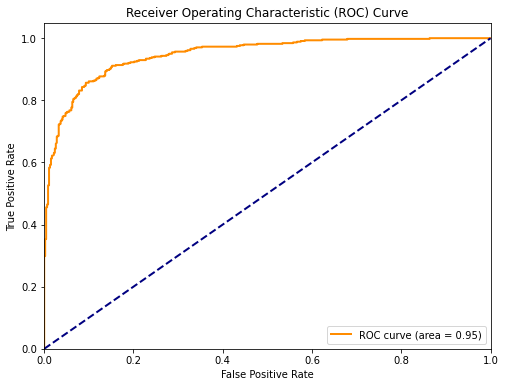

Validation Loss: 0.276237815618515
Validation Accuracy: 0.8857142925262451
Test Loss: 0.30523359775543213
Test Accuracy: 0.8711110949516296
ROC AUC: 0.9477366722831915
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9545 - loss: 0.1318 - val_accuracy: 0.8738 - val_loss: 0.2848
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9548 - loss: 0.1269 - val_accuracy: 0.8762 - val_loss: 0.2798
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9596 - loss: 0.1131 - val_accuracy: 0.8690 - val_loss: 0.2912
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9593 - loss: 0.1147 - val_accuracy: 0.8786 - val_loss: 0.2928
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9645 - loss: 0.0981 - val_accuracy: 0.8714 - val_loss: 0.2954
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9664 - loss: 0.1092 - val_accuracy: 0.8786 - val_loss: 0.2912
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9621 - loss: 0.0997 - val_accuracy: 0.8762 - val_loss: 0.2979
Training Time: 398.27984738349915 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 770ms/step
Inference Time: 10.989094734191895 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 812ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


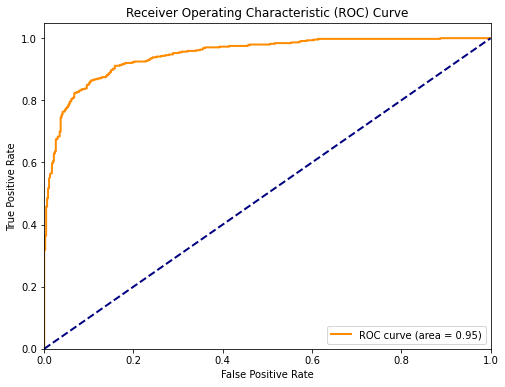

Validation Loss: 0.27983593940734863
Validation Accuracy: 0.8761904835700989
Test Loss: 0.31854164600372314
Test Accuracy: 0.8711110949516296
ROC AUC: 0.9470152535589167
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9566 - loss: 0.1128 - val_accuracy: 0.8810 - val_loss: 0.2830
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9673 - loss: 0.1165 - val_accuracy: 0.8762 - val_loss: 0.2920
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9611 - loss: 0.1140 - val_accuracy: 0.8762 - val_loss: 0.2854
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9647 - loss: 0.0998 - val_accuracy: 0.8786 - val_loss: 0.2952
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9712 - loss: 0.0973 - val_accuracy: 0.8762 - val_loss: 0.2917
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9570 - loss: 0.1063 - val_accuracy: 0.8714 - val_loss: 0.2922
Training Time: 326.64073419570923 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 771ms/step
Inference Time: 10.997856855392456 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


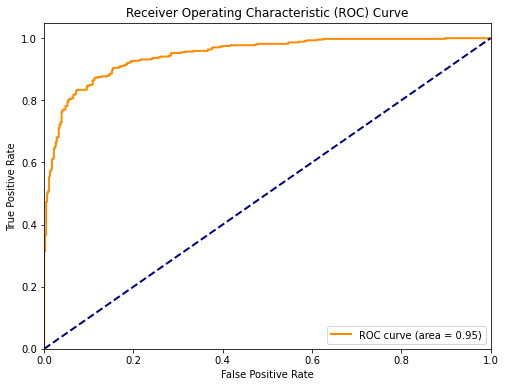

Validation Loss: 0.28297334909439087
Validation Accuracy: 0.8809523582458496
Test Loss: 0.3211846947669983
Test Accuracy: 0.8677777647972107
ROC AUC: 0.9470844306968609
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+GRU+Dense

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Define a custom layer to expand dimensions
class ExpandDimsLayer(Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

# Reshape to fit GRU input
x = ExpandDimsLayer()(x)

# GRU layer
x = GRU(64)(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_10   │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_11   │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 18,770,881 (71.61 MB)

 Trainable params: 448,897 (1.71 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [30]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5898 - loss: 0.6769 - val_accuracy: 0.7286 - val_loss: 0.6158
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7830 - loss: 0.5619 - val_accuracy: 0.8000 - val_loss: 0.4828
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8303 - loss: 0.4325 - val_accuracy: 0.8357 - val_loss: 0.4021
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8438 - loss: 0.3587 - val_accuracy: 0.8381 - val_loss: 0.3710
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8650 - loss: 0.3172 - val_accuracy: 0.8333 - val_loss: 0.3787
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8818 - loss: 0.2997 - val_accuracy: 0.8452 - val_loss: 0.3577
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8752 - loss: 0.2961 - val_accuracy: 0.8667 - val_loss: 0.3285
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8871 - loss: 0.2779 - val_accuracy: 0.8690 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 991ms/step
Inference Time: 15.674925565719604 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 809ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


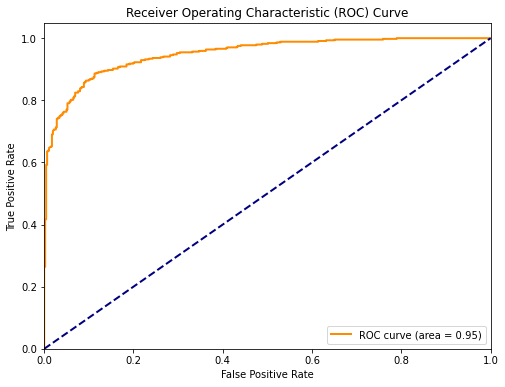

Validation Loss: 0.2891215682029724
Validation Accuracy: 0.8642857074737549
Test Loss: 0.28522464632987976
Test Accuracy: 0.8733333349227905
ROC AUC: 0.9495698664387114
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [32]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9152 - loss: 0.2052 - val_accuracy: 0.8810 - val_loss: 0.3091
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9253 - loss: 0.1845 - val_accuracy: 0.8786 - val_loss: 0.3073
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9141 - loss: 0.2139 - val_accuracy: 0.8714 - val_loss: 0.2892
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9295 - loss: 0.1769 - val_accuracy: 0.8619 - val_loss: 0.3251
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9196 - loss: 0.1980 - val_accuracy: 0.8667 - val_loss: 0.2891
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9455 - loss: 0.1585 - val_accuracy: 0.8643 - val_loss: 0.3008
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9352 - loss: 0.1662 - val_accuracy: 0.8690 - val_loss: 0.2919
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9335 - loss: 0.1591 - val_accuracy: 0.8643 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 778ms/step
Inference Time: 11.105222940444946 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 826ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


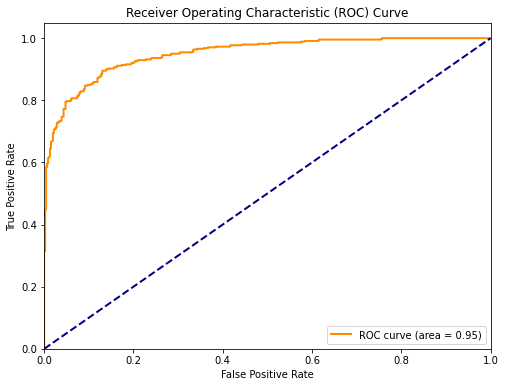

Validation Loss: 0.28909215331077576
Validation Accuracy: 0.8666666746139526
Test Loss: 0.3036361336708069
Test Accuracy: 0.8688889145851135
ROC AUC: 0.9498268100939327
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9437 - loss: 0.1571 - val_accuracy: 0.8690 - val_loss: 0.2923
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9391 - loss: 0.1623 - val_accuracy: 0.8762 - val_loss: 0.2954
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9386 - loss: 0.1643 - val_accuracy: 0.8690 - val_loss: 0.3029
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9458 - loss: 0.1534 - val_accuracy: 0.8786 - val_loss: 0.2909
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9384 - loss: 0.1484 - val_accuracy: 0.8690 - val_loss: 0.2923
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9471 - loss: 0.1502 - val_accuracy: 0.8690 - val_loss: 0.2979
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9514 - loss: 0.1389 - val_accuracy: 0.8714 - val_loss: 0.3161
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9417 - loss: 0.1538 - val_accuracy: 0.8714 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 786ms/step
Inference Time: 11.205886125564575 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 810ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


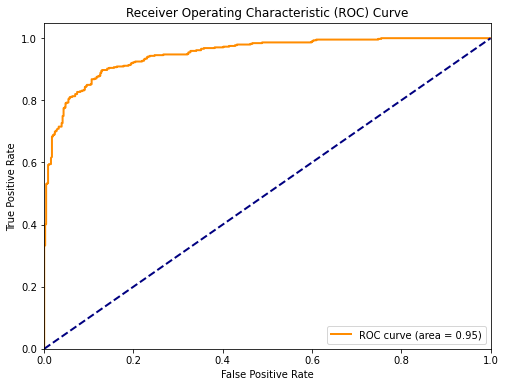

Validation Loss: 0.29091134667396545
Validation Accuracy: 0.8785714507102966
Test Loss: 0.29832977056503296
Test Accuracy: 0.8799999952316284
ROC AUC: 0.9494710419559342
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [36]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9393 - loss: 0.1463 - val_accuracy: 0.8595 - val_loss: 0.3367
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9303 - loss: 0.1753 - val_accuracy: 0.8595 - val_loss: 0.3332
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9533 - loss: 0.1361 - val_accuracy: 0.8714 - val_loss: 0.2991
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9543 - loss: 0.1236 - val_accuracy: 0.8690 - val_loss: 0.3151
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9506 - loss: 0.1229 - val_accuracy: 0.8690 - val_loss: 0.3033
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9580 - loss: 0.1181 - val_accuracy: 0.8714 - val_loss: 0.2982
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9654 - loss: 0.1122 - val_accuracy: 0.8738 - val_loss: 0.3003
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9655 - loss: 0.1149 - val_accuracy: 0.8667 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 778ms/step
Inference Time: 11.093897581100464 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 810ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


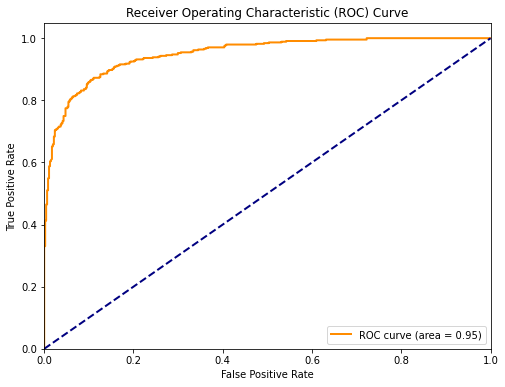

Validation Loss: 0.29815569519996643
Validation Accuracy: 0.8714285492897034
Test Loss: 0.3096310496330261
Test Accuracy: 0.8766666650772095
ROC AUC: 0.9491844509558798
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Attention Mechanism+Dense

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam

# Define custom attention layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        x, alpha = inputs
        return tf.reduce_sum(x * tf.expand_dims(alpha, -1), axis=1)

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Dense layer
x = Dense(1024, activation='relu')(x)

# Attention mechanism
alpha = Dense(1, activation='softmax')(x)
context = AttentionLayer()([x, alpha])

# Dense layer after attention
x = Dense(512, activation='relu')(context)

# Output layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_12   │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_13   │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,815,426 (79.40 MB)

 Trainable params: 2,493,442 (9.51 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [39]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50


/home/lab5/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4940 - loss: 2.7195 - val_accuracy: 0.4762 - val_loss: 0.8465
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4851 - loss: 1.2702 - val_accuracy: 0.4714 - val_loss: 1.1503
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4857 - loss: 2.2093 - val_accuracy: 0.5143 - val_loss: 2.3147
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5128 - loss: 1.4955 - val_accuracy: 0.4857 - val_loss: 1.8513
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4844 - loss: 1.7909 - val_accuracy: 0.5000 - val_loss: 0.7485
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5043 - loss: 1.1249 - val_accuracy: 0.5190 - val_loss: 0.7398
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4900 - loss: 1.0070 - val_accuracy: 0.4619 - val_loss: 0.8215
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4961 - loss: 1.0069 - val_accuracy: 0.4857 - val_loss: 0.7602
Epo

/home/lab5/.local/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 921ms/step
Inference Time: 15.611770629882812 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


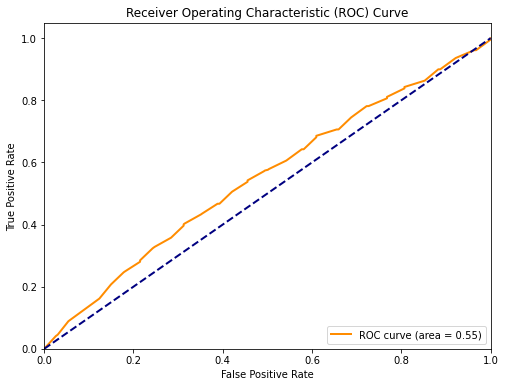

Validation Loss: 0.7397719621658325
Validation Accuracy: 0.5190476179122925
Test Loss: 0.7740300297737122
Test Accuracy: 0.5211111307144165
ROC AUC: 0.5514381432856176
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [41]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5105 - loss: 1.1602 - val_accuracy: 0.5143 - val_loss: 0.8104
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4920 - loss: 0.9430 - val_accuracy: 0.5143 - val_loss: 0.9253
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5124 - loss: 1.4096 - val_accuracy: 0.5143 - val_loss: 1.1077
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5291 - loss: 0.9622 - val_accuracy: 0.4857 - val_loss: 1.9431
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4951 - loss: 1.1749 - val_accuracy: 0.4905 - val_loss: 0.7738
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5250 - loss: 0.7839 - val_accuracy: 0.4857 - val_loss: 1.0660
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4965 - loss: 0.9397 - val_accuracy: 0.4667 - val_loss: 0.7566
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5312 - loss: 0.7557 - val_accuracy: 0.4857 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step
Inference Time: 11.063448667526245 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


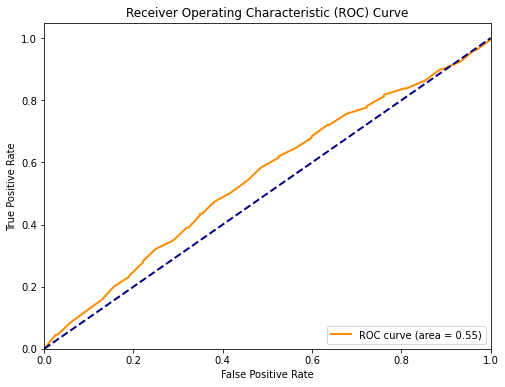

Validation Loss: 0.7566304206848145
Validation Accuracy: 0.46666666865348816
Test Loss: 0.7514411211013794
Test Accuracy: 0.5188888907432556
ROC AUC: 0.5522188566995587
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5102 - loss: 0.8402 - val_accuracy: 0.4857 - val_loss: 1.1302
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5015 - loss: 0.8817 - val_accuracy: 0.4857 - val_loss: 0.9882
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5394 - loss: 0.7692 - val_accuracy: 0.4857 - val_loss: 0.8065
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5118 - loss: 0.9146 - val_accuracy: 0.5143 - val_loss: 0.8659
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5168 - loss: 0.8376 - val_accuracy: 0.5143 - val_loss: 1.3131
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4986 - loss: 1.1040 - val_accuracy: 0.5143 - val_loss: 0.9014
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5191 - loss: 0.8612 - val_accuracy: 0.4857 - val_loss: 0.7495
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5229 - loss: 0.7137 - val_accuracy: 0.4667 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 780ms/step
Inference Time: 11.117044687271118 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 806ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


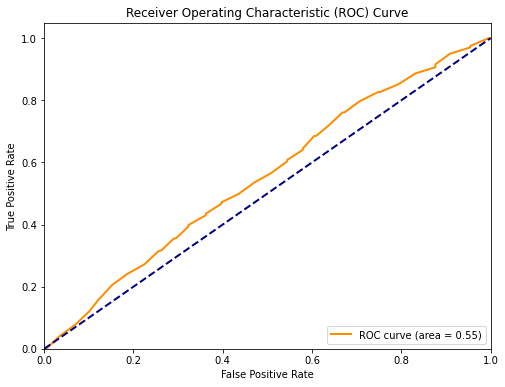

Validation Loss: 0.7307844161987305
Validation Accuracy: 0.46666666865348816
Test Loss: 0.7017975449562073
Test Accuracy: 0.5366666913032532
ROC AUC: 0.5533009847859709
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [45]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5021 - loss: 0.7856 - val_accuracy: 0.5143 - val_loss: 0.8523
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5238 - loss: 0.7749 - val_accuracy: 0.4810 - val_loss: 0.7473
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5099 - loss: 0.8353 - val_accuracy: 0.4667 - val_loss: 0.7192
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5212 - loss: 0.8084 - val_accuracy: 0.4857 - val_loss: 0.7937
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4826 - loss: 0.8350 - val_accuracy: 0.4952 - val_loss: 0.7671
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5158 - loss: 0.7714 - val_accuracy: 0.5143 - val_loss: 0.8867
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5390 - loss: 0.7826 - val_accuracy: 0.5095 - val_loss: 0.7547
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5454 - loss: 0.7119 - val_accuracy: 0.4714 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 774ms/step
Inference Time: 11.02615737915039 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 805ms/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


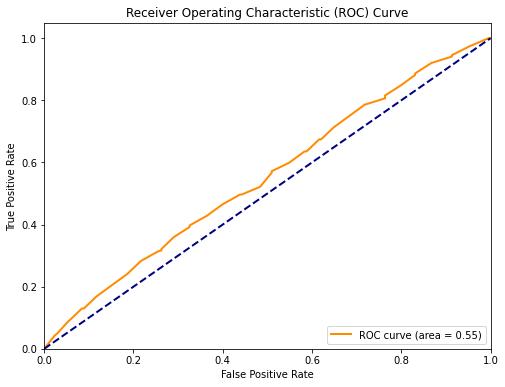

Validation Loss: 0.7191739082336426
Validation Accuracy: 0.46666666865348816
Test Loss: 0.7035590410232544
Test Accuracy: 0.5299999713897705
ROC AUC: 0.5503757800957608
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# Densenet+Capsule network+Dense

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201

# Define Capsule Layer
class CapsuleLayer(tf.keras.layers.Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3):
        super(CapsuleLayer, self).__init__()
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Load pre-trained DenseNet201 model without top (include_top=False)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Additional layers
x = base_model.output

# Flatten the output of DenseNet
x = tf.keras.layers.Flatten()(x)

# Reshape to fit Capsule Layer
x = tf.keras.layers.Reshape((-1, x.shape[-1]))(x)

# Capsule Network
capsule_layer = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)
capsule = capsule_layer(x)  # Example: 10 capsules with dimension 16

# Flatten the output
capsule = tf.keras.layers.Flatten()(capsule)

# Dense layer after Capsule Network
output = tf.keras.layers.Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 33,374,945 (127.32 MB)

 Trainable params: 15,052,961 (57.42 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6597 - loss: 0.6209 - val_accuracy: 0.8024 - val_loss: 0.4726
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.8619 - loss: 0.3689 - val_accuracy: 0.8548 - val_loss: 0.3919
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9161 - loss: 0.2497 - val_accuracy: 0.8476 - val_loss: 0.3958
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9399 - loss: 0.1846 - val_accuracy: 0.8595 - val_loss: 0.3599
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9658 - loss: 0.1312 - val_accuracy: 0.8738 - val_loss: 0.3538
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9688 - loss: 0.1107 - val_accuracy: 0.8571 - val_loss: 0.3515
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9605 - loss: 0.1245 - val_accuracy: 0.8786 - val_loss: 0.3760
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9613 - loss: 0.1066 - val_accuracy: 0.8690 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Inference Time: 17.906654834747314 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


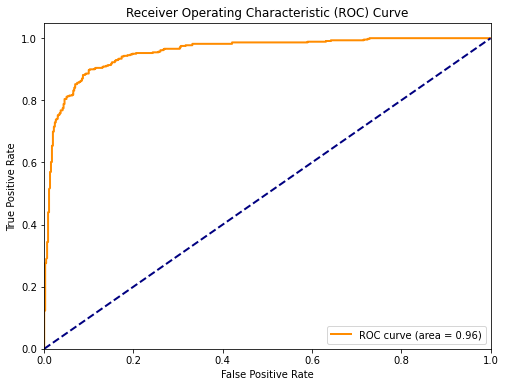

Validation Loss: 0.35056114196777344
Validation Accuracy: 0.8928571343421936
Test Loss: 0.3360580503940582
Test Accuracy: 0.8788889050483704
ROC AUC: 0.9558600447674906
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9878 - loss: 0.0506 - val_accuracy: 0.8762 - val_loss: 0.4525
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9958 - loss: 0.0262 - val_accuracy: 0.8881 - val_loss: 0.4340
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9848 - loss: 0.0467 - val_accuracy: 0.8881 - val_loss: 0.4555
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9901 - loss: 0.0391 - val_accuracy: 0.8738 - val_loss: 0.5010
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9961 - loss: 0.0213 - val_accuracy: 0.8643 - val_loss: 0.3129
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9946 - loss: 0.0520 - val_accuracy: 0.8810 - val_loss: 0.5306
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9999 - loss: 0.0076 - val_accuracy: 0.8690 - val_loss: 0.5132
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9921 - loss: 0.0298 - val_accuracy: 0.8690 - v

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 982ms/step
Inference Time: 13.974676132202148 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


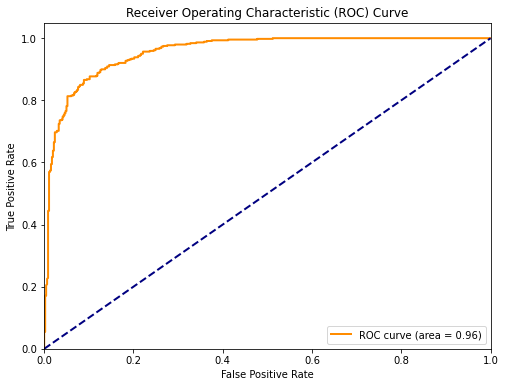

Validation Loss: 0.3129170536994934
Validation Accuracy: 0.8642857074737549
Test Loss: 0.2878125309944153
Test Accuracy: 0.8744444251060486
ROC AUC: 0.956373932077933
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9982 - loss: 0.0445 - val_accuracy: 0.8762 - val_loss: 0.5600
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9984 - loss: 0.0129 - val_accuracy: 0.8643 - val_loss: 0.6500
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9948 - loss: 0.0214 - val_accuracy: 0.8643 - val_loss: 0.6767
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.8762 - val_loss: 0.6778
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8738 - val_loss: 0.6785
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8810 - val_loss: 0.7042
Training Time: 542.7476010322571 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 986ms/step
Inference Time: 14.026606559753418 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


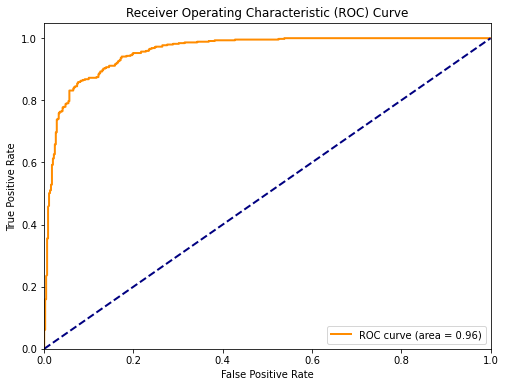

Validation Loss: 0.559955894947052
Validation Accuracy: 0.8761904835700989
Test Loss: 0.4332475960254669
Test Accuracy: 0.8777777552604675
ROC AUC: 0.9579995948196207
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import time

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200,
                    validation_data=(X_val_preprocessed, y_val_encoded),
                    callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.8786 - val_loss: 0.6009
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8833 - val_loss: 0.6229
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.8810 - val_loss: 0.6415
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.8833 - val_loss: 0.6624
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8833 - val_loss: 0.6744
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8833 - val_loss: 0.6891
Training Time: 542.6329071521759 seconds


14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 981ms/step
Inference Time: 13.958054065704346 seconds
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in scalar divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


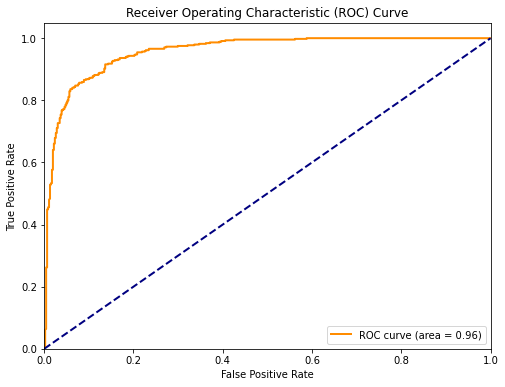

Validation Loss: 0.6008637547492981
Validation Accuracy: 0.8785714507102966
Test Loss: 0.4329771399497986
Test Accuracy: 0.8822222352027893
ROC AUC: 0.9567791124573203
Cohen's Kappa: 0.0
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       461
           1       0.00      0.00      0.00       439

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900

Confusion Matrix:
[[461   0]
 [439   0]]
Metrics saved successfully


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, balanced_accuracy_score, matthews_corrcoef, roc_curve, auc, classification_report, confusion_matrix
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

# Record start time for inference
start_inference_time = time.time()

# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Record end time for inference
end_inference_time = time.time()

# Calculate inference time
inference_time = end_inference_time - start_inference_time
print("Inference Time:", inference_time, "seconds")

# Convert predicted probabilities to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred = model.predict(X_test_preprocessed)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Calculate test loss, test accuracy, validation loss, validation accuracy
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val_preprocessed, y_val_encoded, verbose=0)

# Calculate metrics
roc_auc = roc_auc_score(y_test_encoded, y_test_pred, average='macro')
kappa = cohen_kappa_score(y_test_encoded, y_test_pred_classes)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
mcc = matthews_corrcoef(y_test_encoded, y_test_pred_classes)

# Compute ROC curve for binary classification
fpr, tpr, _ = roc_curve(y_test_encoded, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Classification report and confusion matrix
classification_rep = classification_report(y_test_encoded, y_test_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Print metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("ROC AUC:", roc_auc)
print("Cohen's Kappa:", kappa)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

existing_metrics_df=pd.read_csv('Densenet_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['Densenet+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('Densenet_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")